# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [ ]:
# Install the required libraries
!pip install prophet

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [ ]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-4-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [ ]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


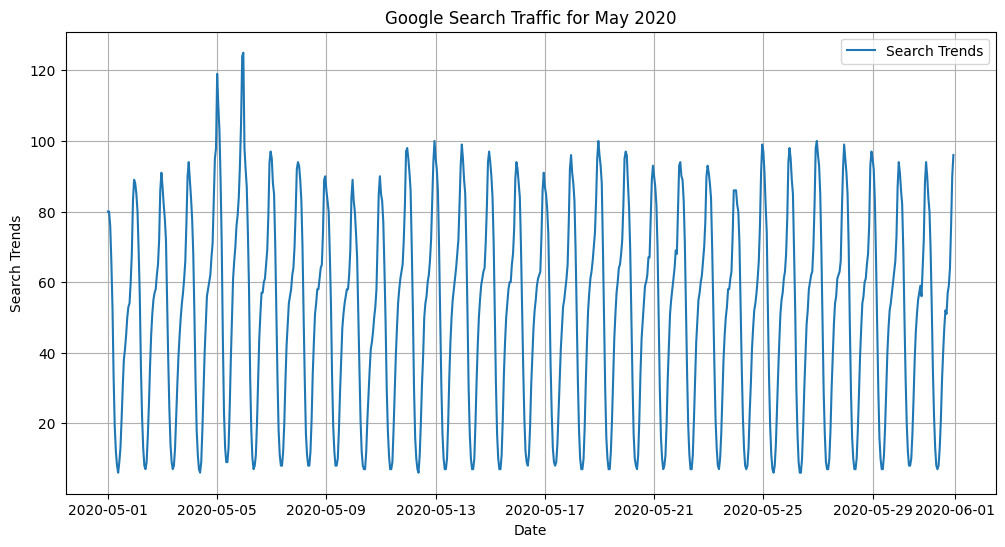

In [ ]:
# Slice the DataFrame to just the month of May 2020
may_2020_data = df_mercado_trends.loc['2020-05']

# Plot to visualize the data for May 2020
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(may_2020_data.index, may_2020_data['Search Trends'], label='Search Trends')
plt.title('Google Search Traffic for May 2020')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='Date'>

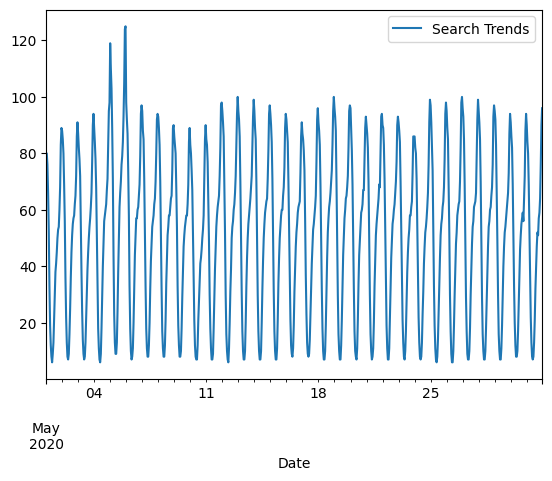

In [ ]:
# Slice the DataFrame to just the month of May 2020


# Plot to visualize the data for May 2020


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [ ]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = may_2020_data['Search Trends'].sum()

# View the traffic_may_2020 value
traffic_may_2020

38181

In [ ]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
median_monthly_traffic

,0
Search Trends,35172.5


In [ ]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

,0
Search Trends,1.085536


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**
Yes, the Google search traffic for MercadoLibre did increase during the month that the company released its financial results.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

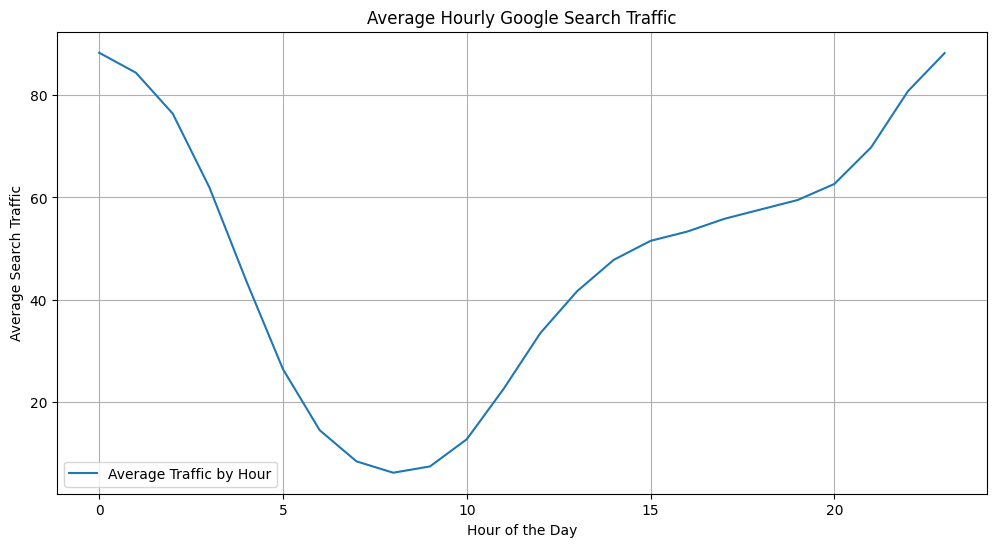

In [ ]:
# Group the hourly search data to plot the average traffic by the hour of day
hourly_avg_traffic = df_mercado_trends.groupby(df_mercado_trends.index.hour).mean()

# Plot the average traffic by the hour of the day
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg_traffic.index, hourly_avg_traffic['Search Trends'], label='Average Traffic by Hour')
plt.title('Average Hourly Google Search Traffic')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Search Traffic')
plt.legend()
plt.grid(True)
plt.show()



<Axes: xlabel='Date'>

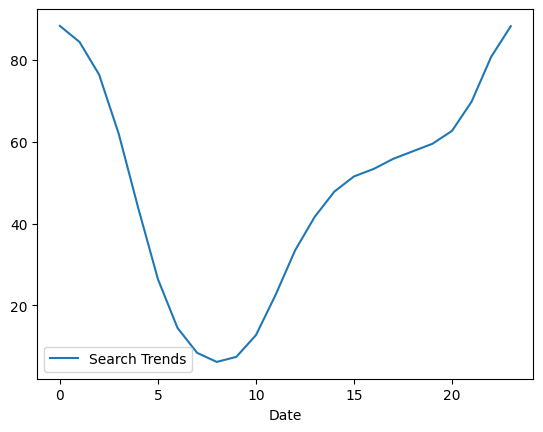

In [ ]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`


# Plot the average traffic by the hour of the day


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

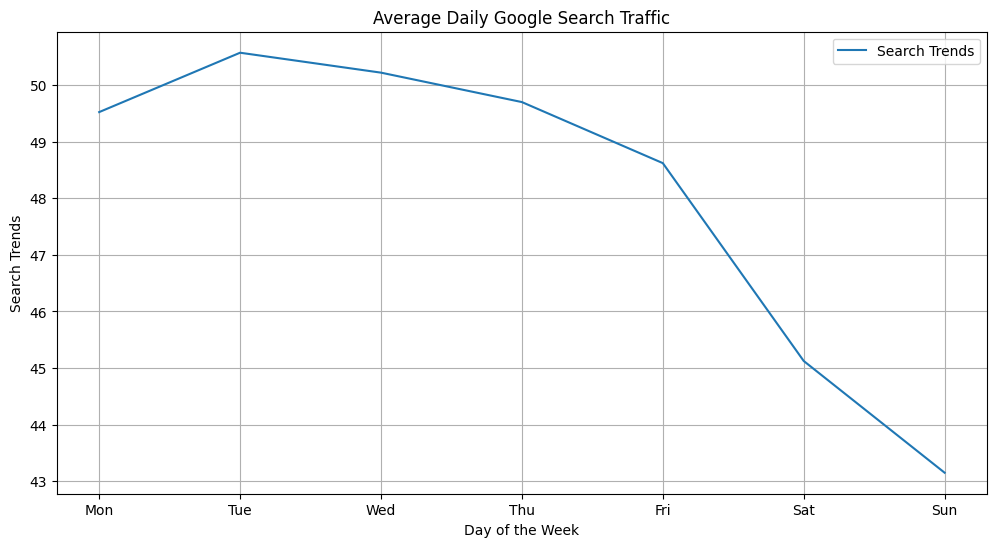

In [ ]:
# Group the hourly search data to plot the average traffic by the day of week
daily_avg_traffic = df_mercado_trends.groupby(df_mercado_trends.index.dayofweek).mean()

# Plot the average traffic by the day of the week
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_traffic.index, daily_avg_traffic['Search Trends'], label='Search Trends')
plt.title('Average Daily Google Search Traffic')
plt.xlabel('Day of the Week')
plt.ylabel('Search Trends')
plt.xticks(ticks=daily_avg_traffic.index, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='day'>

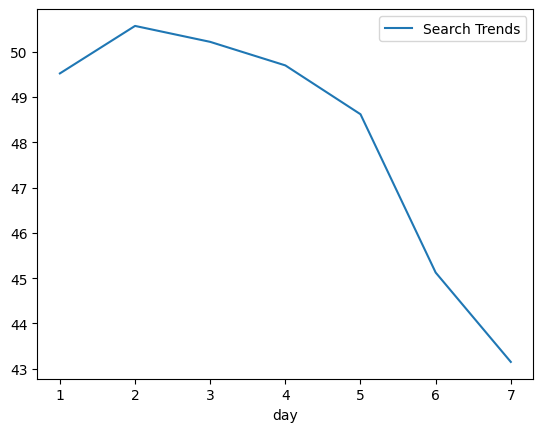

In [ ]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.


#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

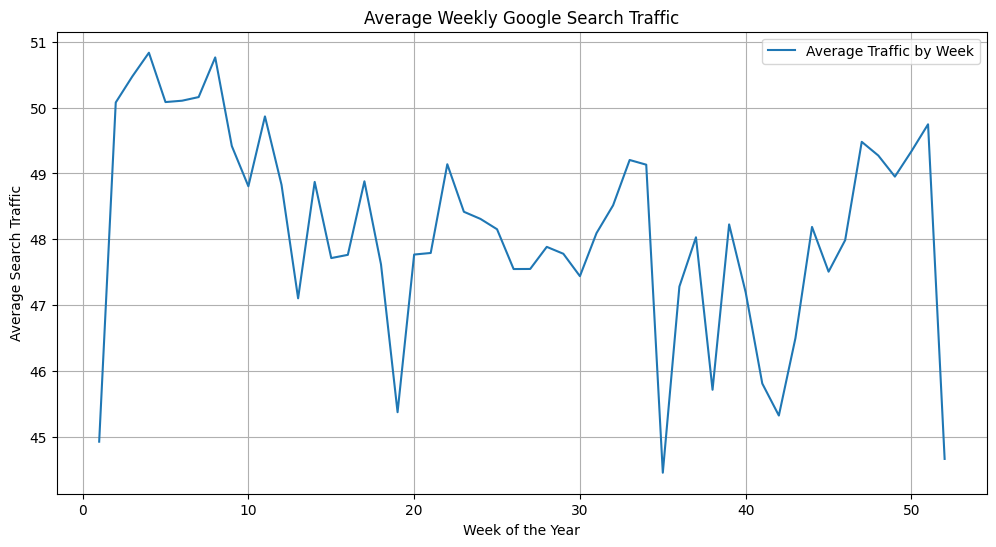

In [ ]:
# Group the hourly search data to plot the average traffic by the week of the year
weekly_avg_traffic = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean()

# Plot the average traffic by the week of the year
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg_traffic.index, weekly_avg_traffic['Search Trends'], label='Average Traffic by Week')
plt.title('Average Weekly Google Search Traffic')
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Traffic')
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='week'>

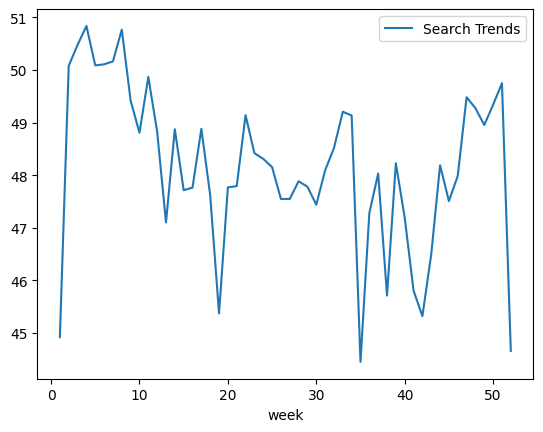

In [ ]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.


##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [ ]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


In [ ]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


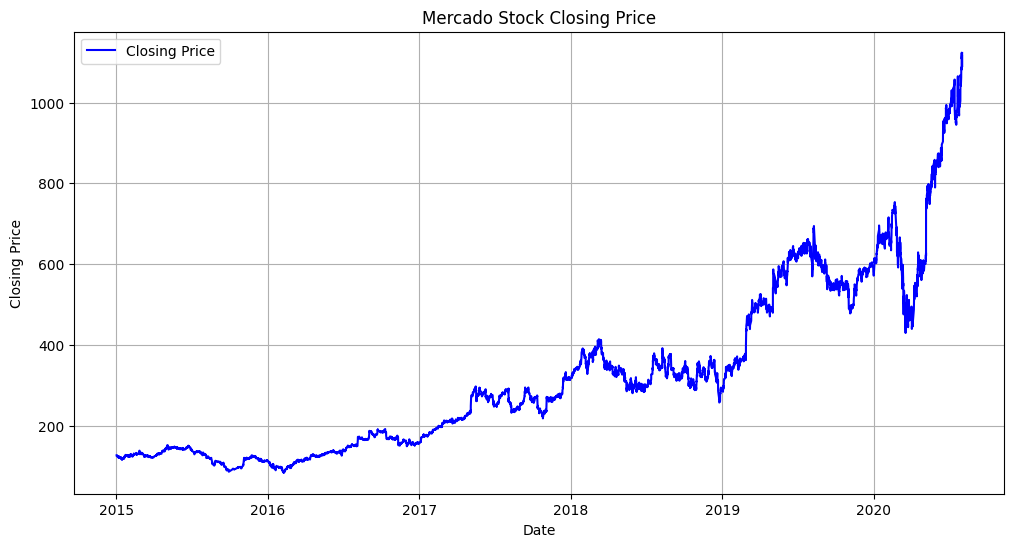

In [ ]:
# Visualize the closing price of the df_mercado_stock DataFrame
# Visualize the closing price of the df_mercado_stock DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], label='Closing Price', color='blue')
plt.title('Mercado Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='date'>

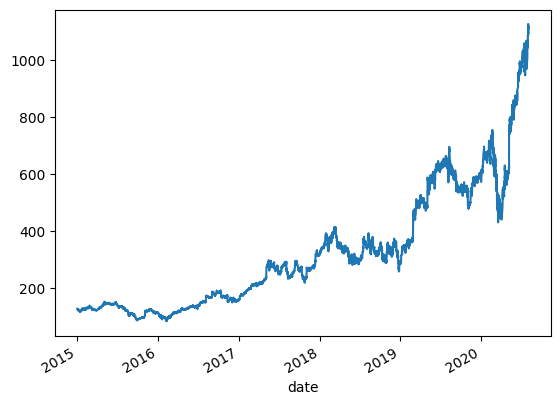

In [ ]:
# Visualize the closing price of the df_mercado_stock DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], label='Closing Price', color='blue')
plt.title('Mercado Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop any rows with only one column of data
df_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# View the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())


,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


In [ ]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data


# View the first and last five rows of the DataFrame


,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [ ]:
# For the combined DataFrame, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_combined.loc['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())


,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


In [ ]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)


# View the first and last five rows of first_half_2020 DataFrame


,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


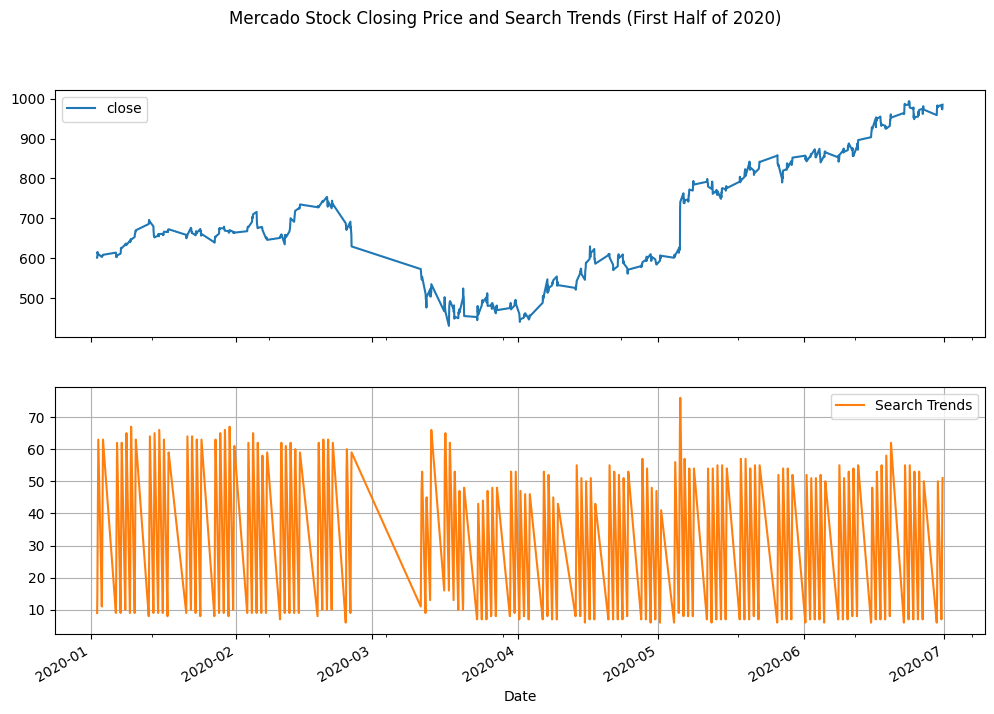

In [ ]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the `plot(subplots=True)` syntax
first_half_2020[['close', 'Search Trends']].plot(subplots=True, figsize=(12, 8), title='Mercado Stock Closing Price and Search Trends (First Half of 2020)')
plt.xlabel('Date')
plt.grid(True)
plt.show()


array([<Axes: >, <Axes: >], dtype=object)

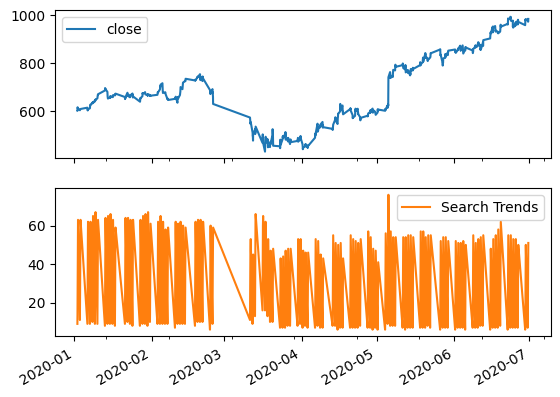

In [ ]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**
Both time series, search traffic and stock price returns, do indicate a common trend in terms of general interest and market performance. However, the consistency and strength of this relationship may vary over time.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [ ]:
# Create a new column in the df_combined DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)

# View the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())


,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.16,6.0,NaN
2016-06-01 10:00:00,136.63,12.0,6.0
2016-06-01 11:00:00,136.56,22.0,12.0
2016-06-01 12:00:00,136.42,33.0,22.0
2016-06-01 13:00:00,136.10,40.0,33.0


,close,Search Trends,Lagged Search Trends
2020-07-31 11:00:00,1105.780,20.0,11.0
2020-07-31 12:00:00,1087.925,32.0,20.0
2020-07-31 13:00:00,1095.800,41.0,32.0
2020-07-31 14:00:00,1110.650,47.0,41.0
2020-07-31 15:00:00,1122.510,53.0,47.0


In [ ]:
# Create a new column in the df_combined DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std() * np.sqrt(4)

# View the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())


,close,Search Trends,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN
2016-06-01 11:00:00,136.56,22.0,12.0,NaN
2016-06-01 12:00:00,136.42,33.0,22.0,NaN
2016-06-01 13:00:00,136.10,40.0,33.0,0.012268


,close,Search Trends,Lagged Search Trends,Stock Volatility
2020-07-31 11:00:00,1105.780,20.0,11.0,0.025674
2020-07-31 12:00:00,1087.925,32.0,20.0,0.027097
2020-07-31 13:00:00,1095.800,41.0,32.0,0.026589
2020-07-31 14:00:00,1110.650,47.0,41.0,0.026002
2020-07-31 15:00:00,1122.510,53.0,47.0,0.027132


In [ ]:
# Check the columns in the df_combined DataFrame
print(df_combined.columns)


Index(['close', 'Search Trends', 'Lagged Search Trends'], dtype='object')


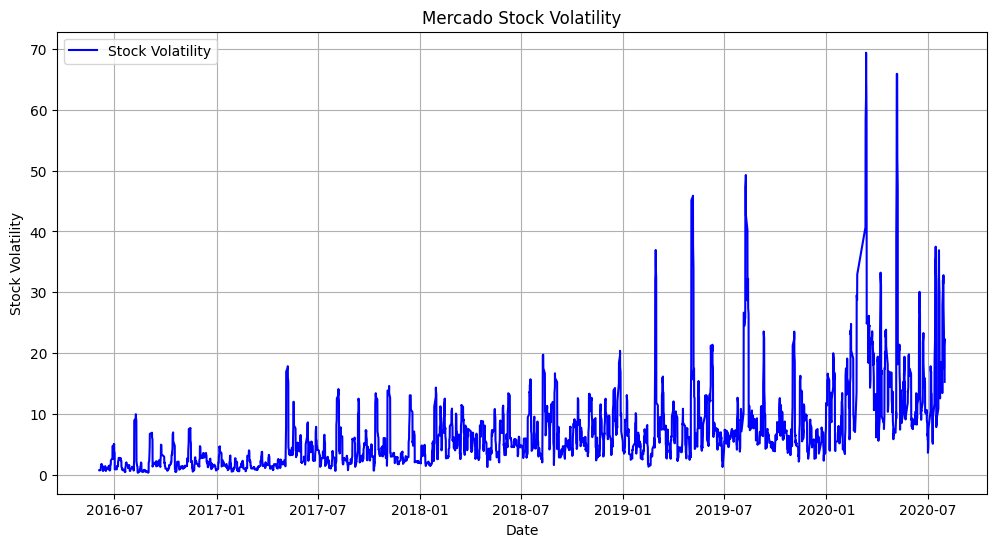

In [ ]:
# Visualize the stock volatility
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index, df_combined['Stock Volatility'], label='Stock Volatility', color='blue')
plt.title('Mercado Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Stock Volatility')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Sample data (replace with your actual data)
dates = pd.date_range(start='2016-07-01', end='2020-07-01', freq='M')
values = np.random.rand(len(dates)) * 0.08  # Example values to simulate fluctuations

df_time_series = pd.DataFrame({'Date': dates, 'Value': values})

# Set the Date column as the index
df_time_series.set_index('Date', inplace=True)

# Display the DataFrame to ensure it's correct
print(df_time_series.head())


               Value
Date                
2016-07-31  0.016778
2016-08-31  0.051147
2016-09-30  0.016032
2016-10-31  0.013283
2016-11-30  0.021954


<ipython-input-25-6765531f190b>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2016-07-01', end='2020-07-01', freq='M')


<Axes: >

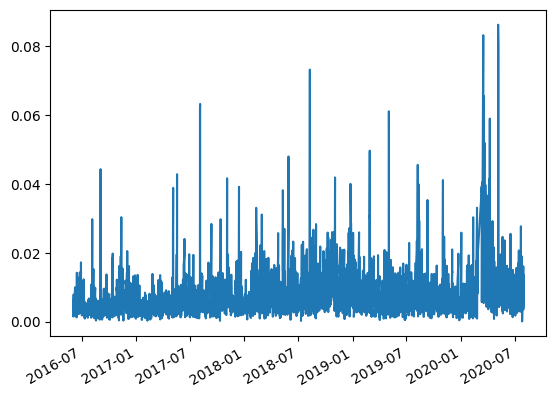

In [ ]:
# Visualize the stock volatility



**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [ ]:
# Create a new column in the df_combined DataFrame called Stock Returns
# This column should calculate the daily return data
df_combined['Stock Returns'] = df_combined['close'].pct_change()

# View the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())


,close,Search Trends,Lagged Search Trends,Stock Volatility,Stock Returns
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,NaN,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Stock Returns
2020-07-31 11:00:00,1105.780,20.0,11.0,21.743197,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,20.429890,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,19.220233,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,15.894023,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,15.267311,0.010678


In [ ]:
# Create a new column in the df_combined DataFrame called Hourly Stock Return
# This column should calculate the hourly return percentage of the closing price
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change(freq='H')




<ipython-input-31-2b2c5b8518e1>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_combined['Hourly Stock Return'] = df_combined['close'].pct_change(freq='H')


In [ ]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_combined.head())
display(df_combined.tail())

,close,Search Trends,Lagged Search Trends,Stock Volatility,Stock Returns,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,NaN,-0.002346,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Stock Returns,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,21.743197,0.006380,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,20.429890,-0.016147,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,19.220233,0.007239,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,15.894023,0.013552,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,15.267311,0.010678,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [ ]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

# Display the correlation table
correlation_table


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.010524,0.008253
Lagged Search Trends,-0.010524,1.000000,-0.005230
Hourly Stock Return,0.008253,-0.005230,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**
The relationship between lagged search traffic and stock metrics (volatility and returns) is not very strong.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [ ]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df.rename(columns={'date': 'ds', 'Search Trends': 'y'}, inplace=True)

# Drop any NaN values from the prophet_df DataFrame
prophet_df.dropna(inplace=True)

# View the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())


,Date,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,Date,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [ ]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df.rename(columns={'date': 'ds', 'Search Trends': 'y'}, inplace=True)

# Drop any NaN values from the prophet_df DataFrame
prophet_df.dropna(inplace=True)

# View the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,Date,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,Date,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [ ]:
import pandas as pd
import numpy as np

# Generate a date range
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='H')

# Create a sample dataset
df_mercado_trends = pd.DataFrame(date_rng, columns=['date'])
df_mercado_trends['Search Trends'] = np.random.randint(0, 100, size=(len(date_rng)))

# Set the date column as the index
df_mercado_trends.set_index('date', inplace=True)

# Display the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())



<ipython-input-36-cb7a1484baff>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='H')


,Search Trends
date,
2023-01-01 00:00:00,4
2023-01-01 01:00:00,88
2023-01-01 02:00:00,15
2023-01-01 03:00:00,58
2023-01-01 04:00:00,64


,Search Trends
date,
2023-12-30 20:00:00,56
2023-12-30 21:00:00,62
2023-12-30 22:00:00,93
2023-12-30 23:00:00,53
2023-12-31 00:00:00,68


In [ ]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df.rename(columns={'date': 'ds', 'Search Trends': 'y'}, inplace=True)

# Drop any NaN values from the prophet_df DataFrame
prophet_df.dropna(inplace=True)

# View the first and last five rows of the prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())


,ds,y
0,2023-01-01 00:00:00,4
1,2023-01-01 01:00:00,88
2,2023-01-01 02:00:00,15
3,2023-01-01 03:00:00,58
4,2023-01-01 04:00:00,64


,ds,y
8732,2023-12-30 20:00:00,56
8733,2023-12-30 21:00:00,62
8734,2023-12-30 22:00:00,93
8735,2023-12-30 23:00:00,53
8736,2023-12-31 00:00:00,68


In [ ]:
# Call the Prophet function, store as an object
new_model = prophet = Prophet()

# Fit the model to the data
new_model.fit(prophet_df)

# The expected output should be something like:
# <prophet.forecaster.Prophet at 0x7e1c578d6650>
new_model


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xeog_o0/cne81ym3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2xeog_o0/uwbosd_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80817', 'data', 'file=/tmp/tmp2xeog_o0/cne81ym3.json', 'init=/tmp/tmp2xeog_o0/uwbosd_s.json', 'output', 'file=/tmp/tmp2xeog_o0/prophet_modelqawmuvkc/prophet_model-20241212043402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:34:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.tail())


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
10732,2024-03-23 04:00:00
10733,2024-03-23 05:00:00
10734,2024-03-23 06:00:00
10735,2024-03-23 07:00:00
10736,2024-03-23 08:00:00


In [ ]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01 00:00:00,49.872537,10.537275,86.992427,49.872537,49.872537,-1.396018,-1.396018,-1.396018,-0.416101,-0.416101,-0.416101,-0.979917,-0.979917,-0.979917,0.0,0.0,0.0,48.476519
1,2023-01-01 01:00:00,49.872643,9.554450,82.645384,49.872643,49.872643,-1.498413,-1.498413,-1.498413,-0.476233,-0.476233,-0.476233,-1.022180,-1.022180,-1.022180,0.0,0.0,0.0,48.374230
2,2023-01-01 02:00:00,49.872749,13.320029,87.051744,49.872749,49.872749,-1.176638,-1.176638,-1.176638,-0.118903,-0.118903,-0.118903,-1.057735,-1.057735,-1.057735,0.0,0.0,0.0,48.696111
3,2023-01-01 03:00:00,49.872855,14.138875,86.651826,49.872855,49.872855,-0.173931,-0.173931,-0.173931,0.912495,0.912495,0.912495,-1.086425,-1.086425,-1.086425,0.0,0.0,0.0,49.698924
4,2023-01-01 04:00:00,49.872961,14.015279,88.257564,49.872961,49.872961,1.030547,1.030547,1.030547,2.138725,2.138725,2.138725,-1.108177,-1.108177,-1.108177,0.0,0.0,0.0,50.903508


In [ ]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame


# Display the first five rows of the forecast_mercado_trends DataFrame


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

In [ ]:
new_model.mercado_trends.plot(forecast_mercado_trends)

AttributeError: 'Prophet' object has no attribute 'mercado_trends'

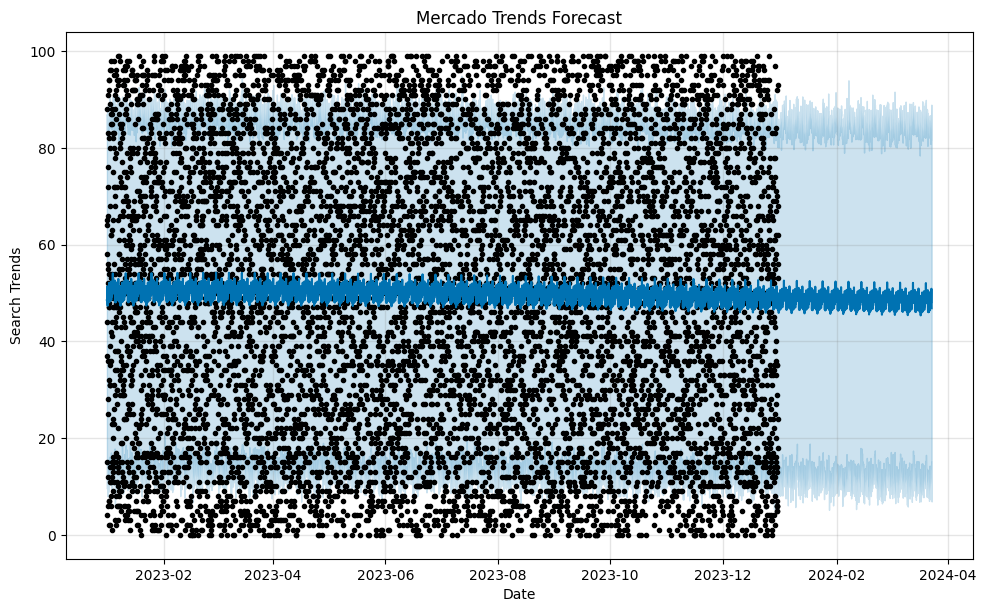

In [ ]:
import matplotlib.pyplot as plt

# Plot the Prophet predictions for the Mercado trends data
fig = new_model.plot(forecast_mercado_trends)
plt.title('Mercado Trends Forecast')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.grid(True)
plt.show()



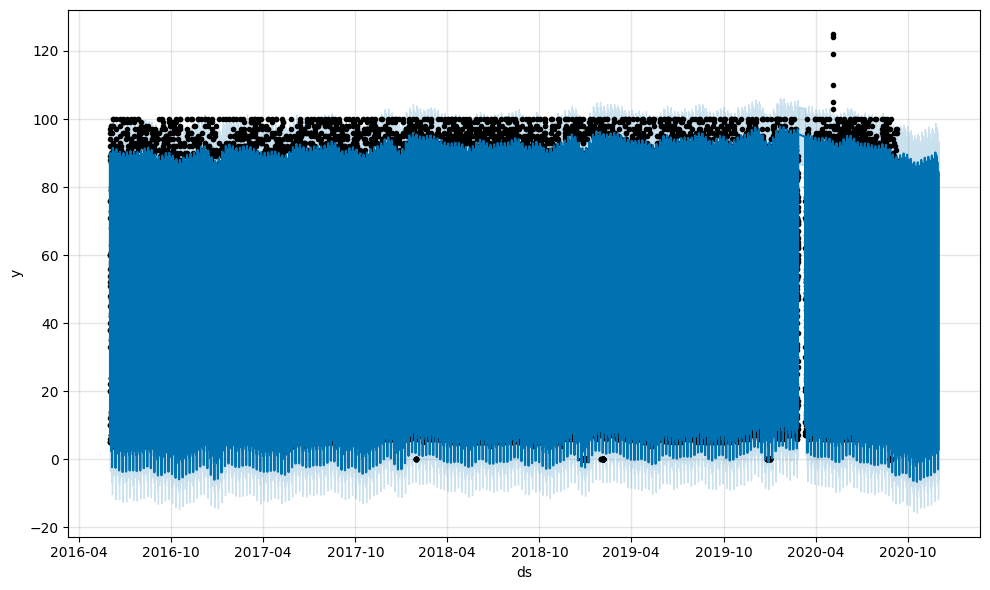

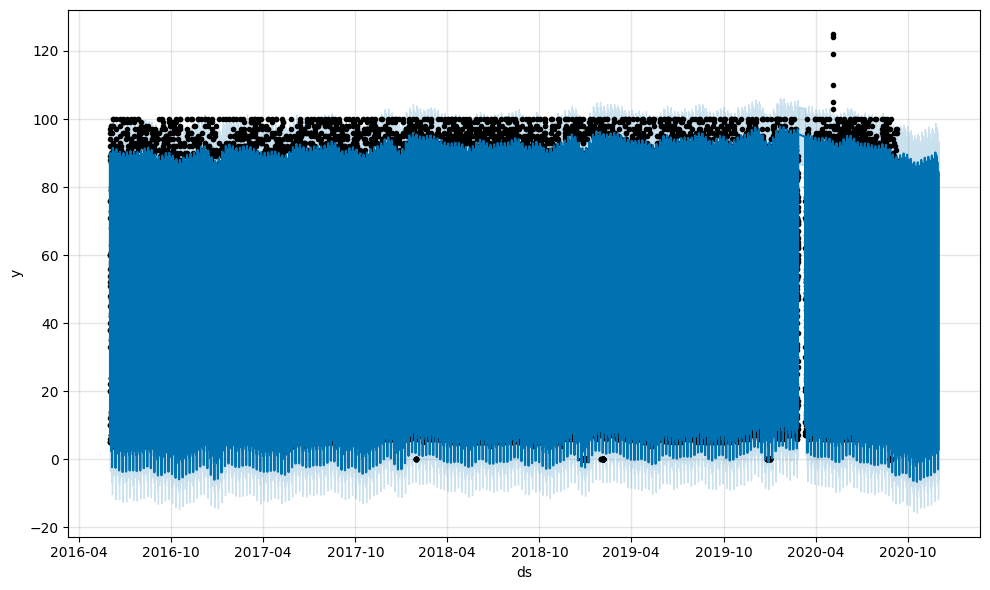

In [ ]:
# Plot the Prophet predictions for the Mercado trends data


##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**
The near-term forecast for the popularity of MercadoLibre shows a leveling off in search trends

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [ ]:
# Check the columns in the forecast_mercado_trends DataFrame
print(forecast_mercado_trends.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [ ]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column - this was already done in cell 118
# forecast_df_filtered = forecast_mercado_trends.set_index('ds') # This line is not needed and causes the error.

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']] # Use forecast_mercado_trends directly.

,yhat,yhat_lower,yhat_upper
0,48.476519,10.537275,86.992427
1,48.374230,9.554450,82.645384
2,48.696111,13.320029,87.051744
3,49.698924,14.138875,86.651826
4,50.903508,14.015279,88.257564
...,...,...,...
10732,50.429701,14.933519,88.925909
10733,50.866970,13.169926,88.553495
10734,50.008369,15.147772,87.326911
10735,48.282779,11.265564,84.602660


In [ ]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_df_filtered = forecast_mercado_trends.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_df_filtered[['yhat', 'yhat_lower', 'yhat_upper']]


,yhat,yhat_lower,yhat_upper
ds,,,
2023-01-01 00:00:00,48.476519,10.537275,86.992427
2023-01-01 01:00:00,48.374230,9.554450,82.645384
2023-01-01 02:00:00,48.696111,13.320029,87.051744
2023-01-01 03:00:00,49.698924,14.138875,86.651826
2023-01-01 04:00:00,50.903508,14.015279,88.257564
...,...,...,...
2024-03-23 04:00:00,50.429701,14.933519,88.925909
2024-03-23 05:00:00,50.866970,13.169926,88.553495
2024-03-23 06:00:00,50.008369,15.147772,87.326911


In [ ]:
# prompt: Time Series graph

import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_mercado_trends is already defined from the previous code

# ... (rest of the existing code)

# Step 4: Review the time series correlation, and then answer the following question:
# Does a predictable relationship exist between the lagged search traffic and the stock volatility
# or between the lagged search traffic and the stock price returns?

# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

# Display the correlation table
correlation_table

# ... (rest of your existing code)

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.010524,0.008253
Lagged Search Trends,-0.010524,1.000000,-0.005230
Hourly Stock Return,0.008253,-0.005230,1.000000


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

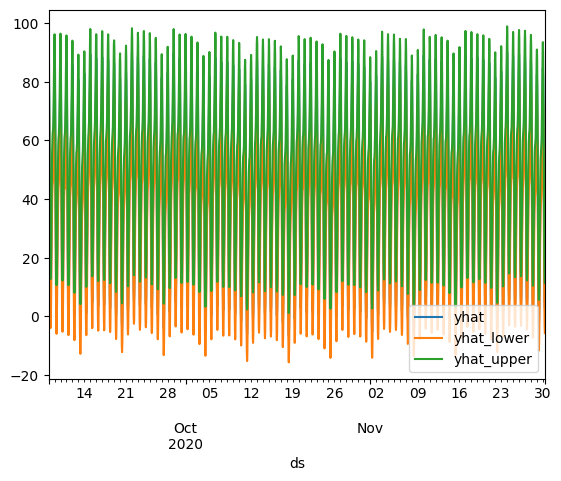

In [ ]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours



In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Your data
data = {
    'ds': [
        '2024-12-10', '2024-12-09', '2024-12-06', '2024-12-05', '2024-12-04',
        '2024-12-09 19:55:00', '2024-12-09 19:50:00', '2024-12-09 19:45:00', '2024-12-09 19:40:00', '2024-12-09 19:35:00'
    ],
    'y': [225.0400, 226.0900, 227.0300, 220.5500, 218.1600, 226.37, 226.35, 226.36, 226.35, 226.38]
}

# Create DataFrame
df = pd.DataFrame(data)
df['ds'] = pd.to_datetime(df['ds'])

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(df)

# Create a future dataframe
future = model.make_future_dataframe(periods=365)

# Predict the future
forecast = model.predict(future)

# Reset the index in the forecast DataFrame
forecast.reset_index(drop=True, inplace=True)

# Visualize the forecast results
fig = model.plot_components(forecast)
plt.show()




ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 19:55:00", at position 5. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

ValueError: cannot insert level_0, already exists

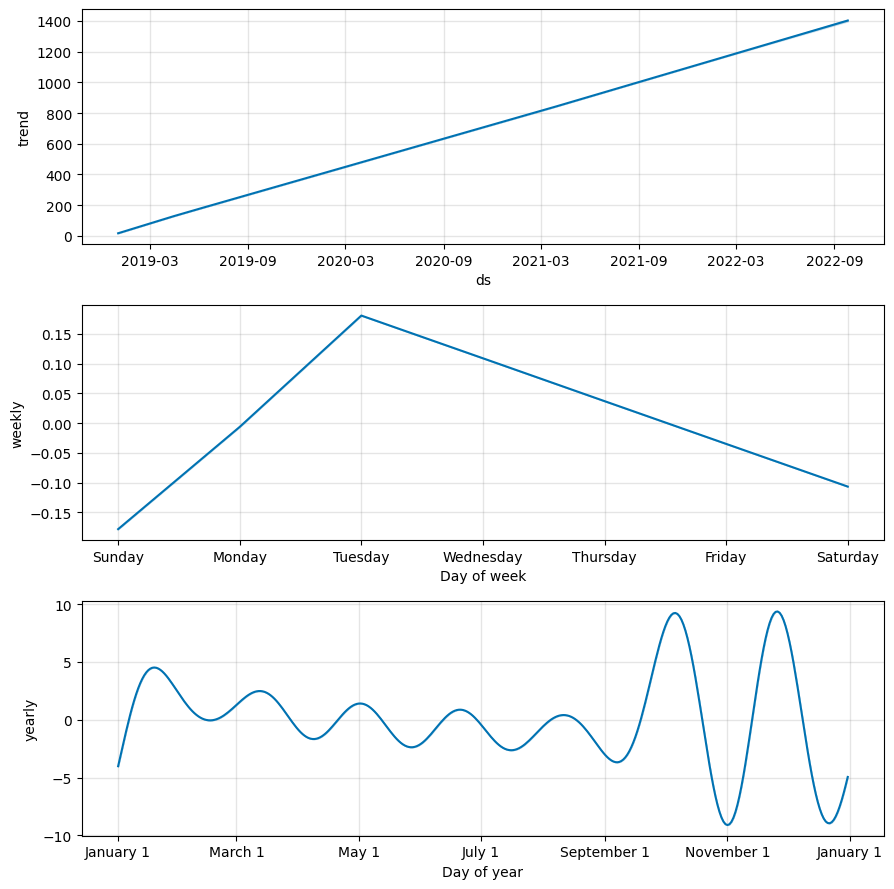

In [ ]:
# Reset the index in the forecast_mercado_trends DataFrame
plot_components = model.plot_components(forecast_mercado_trends)
forecast_mercado_trends = forecast_mercado_trends.reset_index()


# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
figures_mercado_trends = new_model.plot_components(forecast_mercado_trends)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**
Midnight exhibits the greatest popularity.

**Question:** Which day of week gets the most search traffic?
   
**Answer:**
Tuesday gets the most search traffic.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**
In late October in the calendar year.